<a href="https://colab.research.google.com/github/ranioktaviana/Analisis-Prediksi-Data-Pengangguran-Berdasarkan-Tingkat-Pendidikan-Menggunakan-Metode-Regresi-Linear/blob/main/Analisis_data_pengangguran_berdasarkan_tingkat_pendidikan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('/content/Data Training-1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Periode                     35 non-null     int64 
 1   Bulan                       35 non-null     object
 2   Tidak/belum pernah sekolah  35 non-null     int64 
 3   Tidak/belum tamat SD        35 non-null     int64 
 4   SD                          35 non-null     int64 
 5   SLTP                        35 non-null     int64 
 6   SLTA Umum/SMU               35 non-null     int64 
 7   SLTA Kejuruan/SMK           35 non-null     int64 
 8   Akademi/Diploma             35 non-null     int64 
 9   Universitas                 35 non-null     int64 
 10  Total                       35 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe()

,Periode,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total
count,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,2014.228571,83398.457143,496154.714286,1.462738e+06,1.697168e+06,2.153685e+06,1.422718e+06,290182.771429,642869.171429,8.247912e+06
std,5.082182,53949.291460,105794.400661,5.112940e+05,4.367373e+05,3.518458e+05,3.361657e+05,103575.191557,167112.979108,1.233931e+06
min,2006.000000,15206.000000,328781.000000,8.657780e+05,1.137195e+06,1.546699e+06,8.473650e+05,159490.000000,375601.000000,6.898796e+06
25%,2010.000000,38596.500000,422384.000000,1.219224e+06,1.343867e+06,1.902169e+06,1.184779e+06,219345.000000,548211.000000,7.125746e+06
50%,2014.000000,79764.000000,489152.000000,1.320392e+06,1.650387e+06,2.133627e+06,1.383022e+06,254457.000000,626621.000000,8.319779e+06
75%,2018.500000,107820.500000,579941.000000,1.487256e+06,1.828030e+06,2.437820e+06,1.595546e+06,317788.500000,743362.000000,9.032334e+06
max,2022.000000,234465.000000,737610.000000,2.753548e+06,2.860007e+06,2.851518e+06,2.326599e+06,538186.000000,999543.000000,1.110469e+07


In [5]:
missing_values = df.isnull().sum()
missing_values

,0
Periode,0
Bulan,0
Tidak/belum pernah sekolah,0
Tidak/belum tamat SD,0
SD,0
SLTP,0
SLTA Umum/SMU,0
SLTA Kejuruan/SMK,0
Akademi/Diploma,0
Universitas,0


In [6]:
MONTH_MAPPING = {
    'Januari': '01',
    'Februari': '02',
    'Maret': '03',
    'April': '04',
    'Mei': '05',
    'Juni': '06',
    'Juli': '07',
    'Agustus': '08',
    'September': '09',
    'Oktober': '10',
    'November': '11',
    'Desember': '12'
}

In [7]:
df = df.drop_duplicates()

df['Date'] = df.apply(lambda row: pd.to_datetime(f"{row['Periode']}-{MONTH_MAPPING[row['Bulan']]}-01"), axis=1)

df = df.sort_values('Date')

edu_columns = [
    'Tidak/belum pernah sekolah',
    'Tidak/belum tamat SD',
    'SD',
    'SLTP',
    'SLTA Umum/SMU',
    'SLTA Kejuruan/SMK',
    'Akademi/Diploma',
    'Universitas'
]

for col in edu_columns:
    df[f'{col}_Percentage'] = df[col] / df['Total'] * 100

df = df.reset_index(drop=True)

df

,Periode,Bulan,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total,Date,Tidak/belum pernah sekolah_Percentage,Tidak/belum tamat SD_Percentage,SD_Percentage,SLTP_Percentage,SLTA Umum/SMU_Percentage,SLTA Kejuruan/SMK_Percentage,Akademi/Diploma_Percentage,Universitas_Percentage
0,2006,Februari,234465,614960,2675459,2860007,2842876,1204140,297185,375601,11104693,2006-02-01,2.111405,5.537839,24.093048,25.754940,25.600672,10.843524,2.676211,3.382363
1,2006,Agustus,170666,611254,2589699,2730045,2851518,1305190,278074,395554,10932000,2006-08-01,1.561160,5.591420,23.689160,24.972969,26.084138,11.939169,2.543670,3.618313
2,2007,Februari,145750,520316,2753548,2643062,2630360,1114675,330316,409890,10547917,2007-02-01,1.381789,4.932879,26.105135,25.057668,24.937246,10.567726,3.131576,3.885981
3,2007,Agustus,94301,438519,2179792,2264198,2532204,1538349,397191,566588,10011142,2007-08-01,0.941960,4.380309,21.773660,22.616780,25.293858,15.366369,3.967489,5.659574
4,2008,Februari,79764,448431,2216748,2166619,2204377,1165582,519867,626202,9427590,2008-02-01,0.846070,4.756581,23.513411,22.981685,23.382190,12.363520,5.514315,6.642228
5,2008,Agustus,103206,443832,2099968,1973986,2403394,1409128,362683,598318,9394515,2008-08-01,1.098577,4.724374,22.353128,21.012112,25.582949,14.999476,3.860582,6.368801
6,2009,Februari,60347,415955,2143747,2054682,2133627,1337586,486399,626621,9258964,2009-02-01,0.651768,4.492457,23.153206,22.191273,23.043906,14.446389,5.253277,6.767723
7,2009,Agustus,90471,547430,1531671,1770823,2472245,1407226,441100,701651,8962617,2009-08-01,1.009426,6.107926,17.089551,19.757879,27.583963,15.701061,4.921554,7.828640
8,2010,Februari,59066,547164,1522465,1657452,2111256,1336881,538186,820020,8592490,2010-02-01,0.687414,6.367933,17.718554,19.289542,24.570945,15.558715,6.263446,9.543450
9,2010,Agustus,157586,600221,1402858,1661449,2149123,1195192,443222,710128,8319779,2010-08-01,1.894113,7.214386,16.861722,19.969869,25.831491,14.365670,5.327329,8.535419


Fitting 2 folds for each of 50 candidates, totalling 100 fits


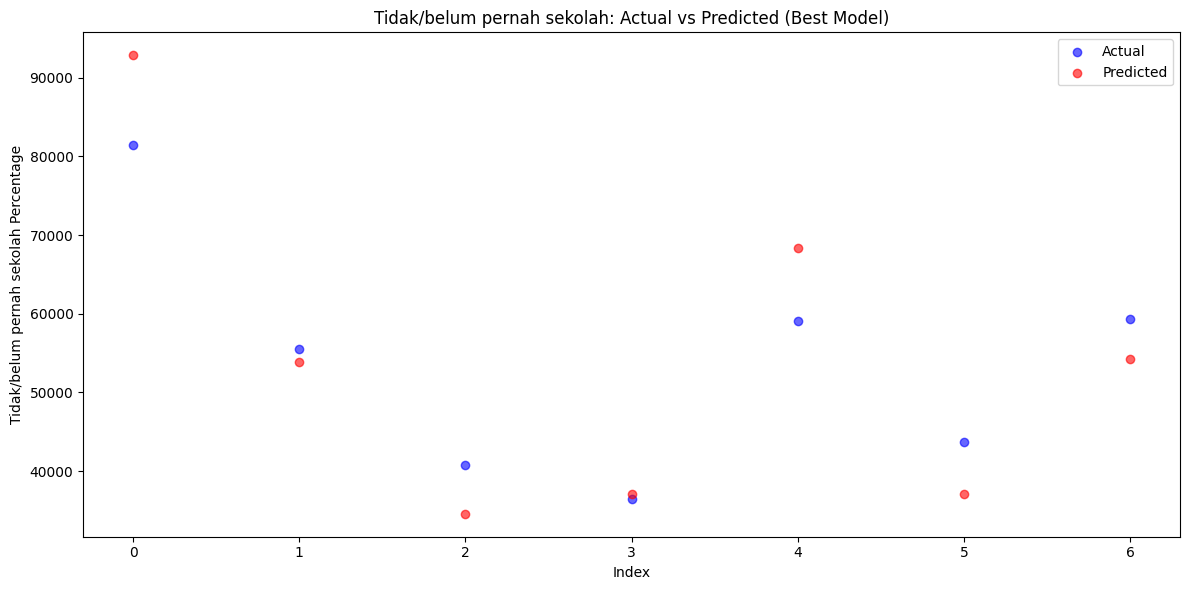

Best Hyperparameters for Tidak/belum pernah sekolah: {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Mean Squared Error (Train) for Tidak/belum pernah sekolah: 727514.38
R-squared Score (Train) for Tidak/belum pernah sekolah: 1.00
Mean Squared Error (Test) for Tidak/belum pernah sekolah: 47021924.00
R-squared Score (Test) for Tidak/belum pernah sekolah: 0.76
Fitting 2 folds for each of 50 candidates, totalling 100 fits


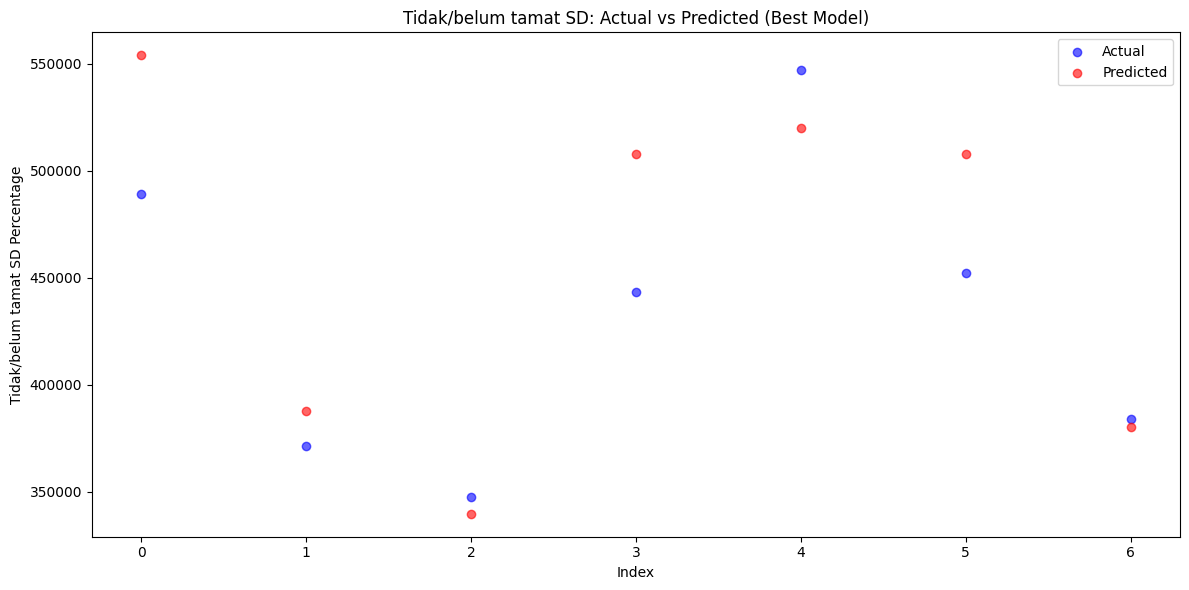

Best Hyperparameters for Tidak/belum tamat SD: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Mean Squared Error (Train) for Tidak/belum tamat SD: 269915136.00
R-squared Score (Train) for Tidak/belum tamat SD: 0.97
Mean Squared Error (Test) for Tidak/belum tamat SD: 1789012864.00
R-squared Score (Test) for Tidak/belum tamat SD: 0.58
Fitting 2 folds for each of 50 candidates, totalling 100 fits


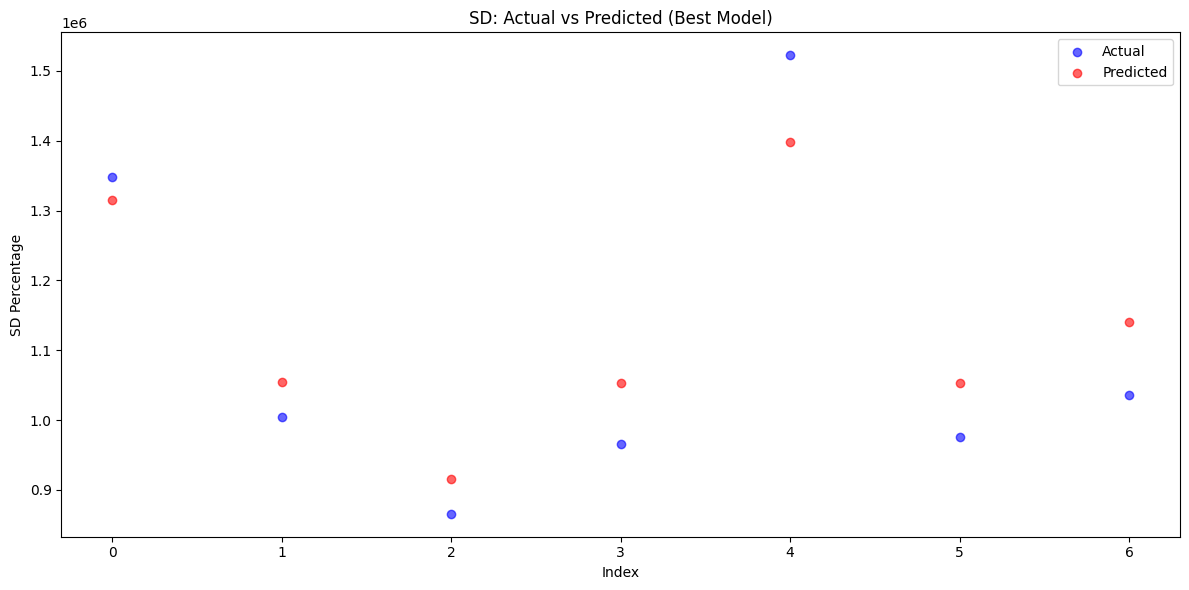

Best Hyperparameters for SD: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
Mean Squared Error (Train) for SD: 56726792.00
R-squared Score (Train) for SD: 1.00
Mean Squared Error (Test) for SD: 6566992384.00
R-squared Score (Test) for SD: 0.87
Fitting 2 folds for each of 50 candidates, totalling 100 fits


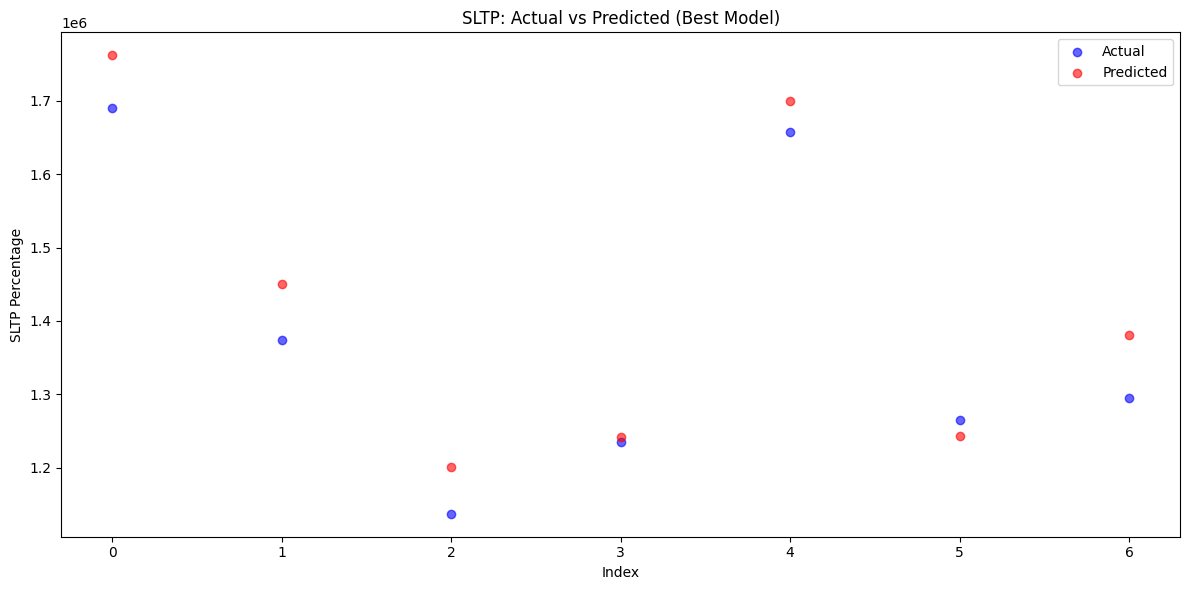

Best Hyperparameters for SLTP: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Mean Squared Error (Train) for SLTP: 62209144.00
R-squared Score (Train) for SLTP: 1.00
Mean Squared Error (Test) for SLTP: 3572429056.00
R-squared Score (Test) for SLTP: 0.91
Fitting 2 folds for each of 50 candidates, totalling 100 fits


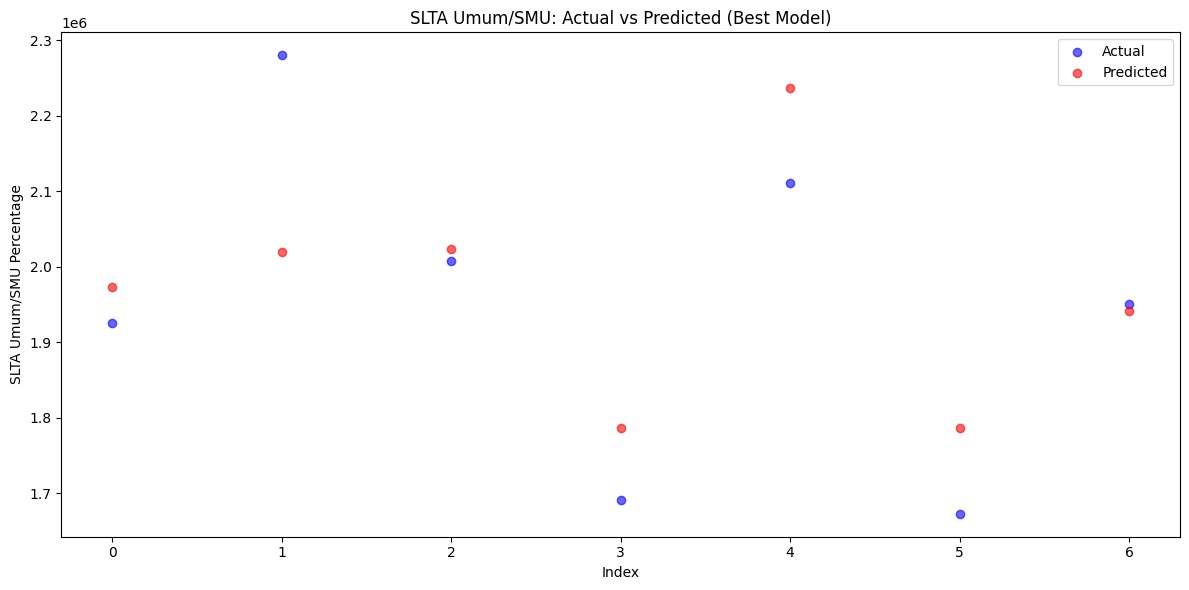

Best Hyperparameters for SLTA Umum/SMU: {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Mean Squared Error (Train) for SLTA Umum/SMU: 7743477760.00
R-squared Score (Train) for SLTA Umum/SMU: 0.94
Mean Squared Error (Test) for SLTA Umum/SMU: 15406056448.00
R-squared Score (Test) for SLTA Umum/SMU: 0.62
Fitting 2 folds for each of 50 candidates, totalling 100 fits


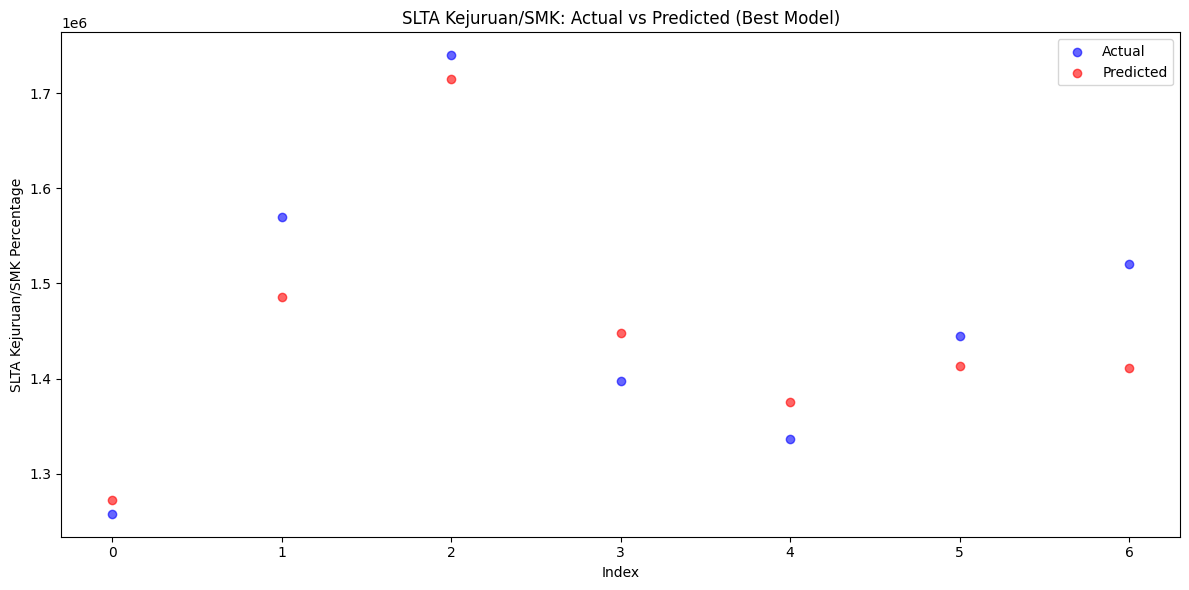

Best Hyperparameters for SLTA Kejuruan/SMK: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Mean Squared Error (Train) for SLTA Kejuruan/SMK: 13363090.00
R-squared Score (Train) for SLTA Kejuruan/SMK: 1.00
Mean Squared Error (Test) for SLTA Kejuruan/SMK: 3554815488.00
R-squared Score (Test) for SLTA Kejuruan/SMK: 0.84
Fitting 2 folds for each of 50 candidates, totalling 100 fits


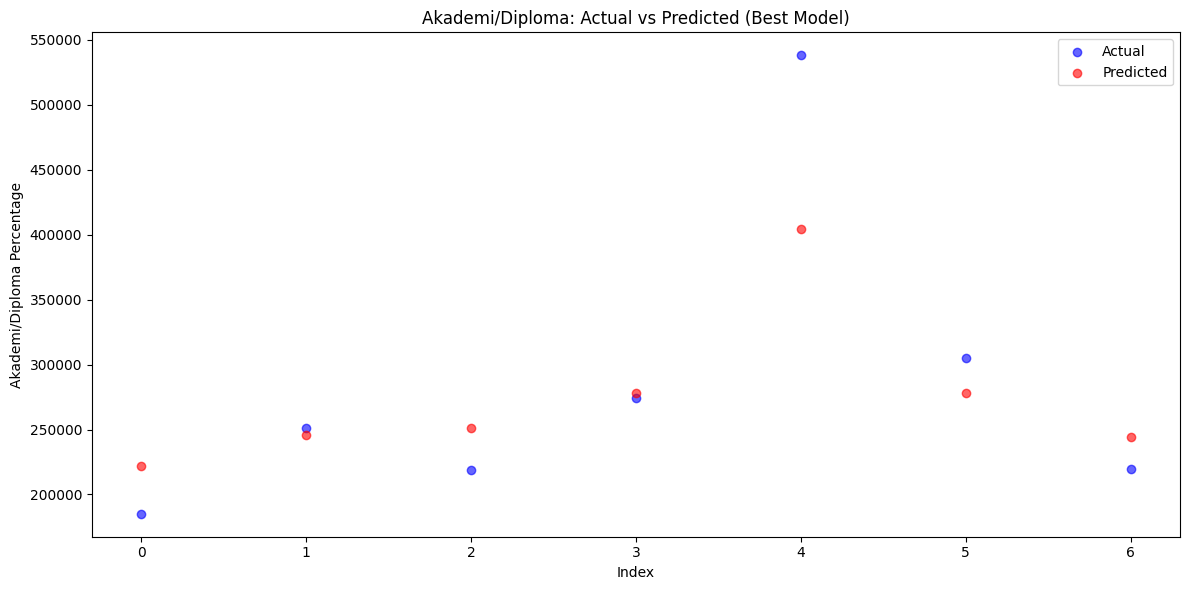

Best Hyperparameters for Akademi/Diploma: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}
Mean Squared Error (Train) for Akademi/Diploma: 1141086848.00
R-squared Score (Train) for Akademi/Diploma: 0.90
Mean Squared Error (Test) for Akademi/Diploma: 3086216960.00
R-squared Score (Test) for Akademi/Diploma: 0.74
Fitting 2 folds for each of 50 candidates, totalling 100 fits


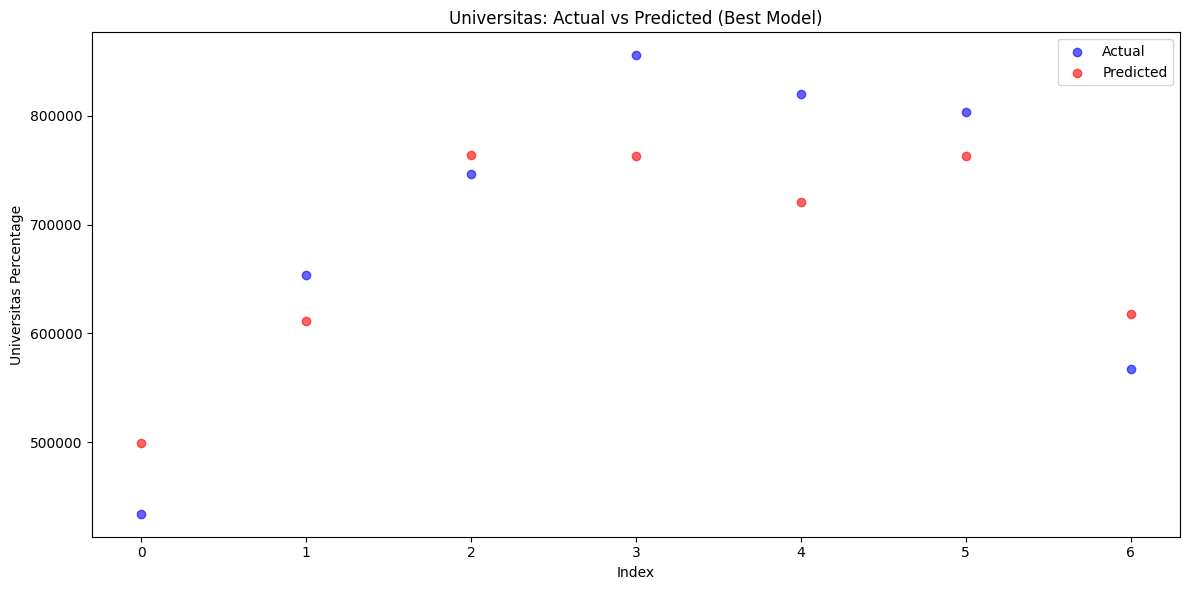

Best Hyperparameters for Universitas: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
Mean Squared Error (Train) for Universitas: 106145720.00
R-squared Score (Train) for Universitas: 1.00
Mean Squared Error (Test) for Universitas: 4127158528.00
R-squared Score (Test) for Universitas: 0.80
                                     mse        r2     mse_train  r2_train  \
Tidak/belum pernah sekolah  4.702192e+07  0.764560  7.275144e+05  0.999768   
Tidak/belum tamat SD        1.789013e+09  0.584125  2.699151e+08  0.973896   
SD                          6.566992e+09  0.865293  5.672679e+07  0.999773   
SLTP                        3.572429e+09  0.908484  6.220914e+07  0.999663   
SLTA Umum/SMU               1.540606e+10  0.619122  7.743478e+09  0.937263   
SLTA Kejuruan/SMK           3.554815e+09  0.837991  1.336309e+07  0.999910   
Akademi/Diploma             3.086217e+09  0.743808  1.14

{}

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

def optimize_model_xgboost(df, edu_columns):
    results = {}
    models = {}

    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
    }

    for col in edu_columns:
        y = df[col].values

        X = df.drop(columns=edu_columns).select_dtypes(include=['float64', 'int64']).values

        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        model = XGBRegressor(random_state=42, eval_metric='rmse', early_stopping_rounds=10)

        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=50, scoring='neg_mean_squared_error',
                                           cv=KFold(n_splits=2),
                                           n_jobs=-1, random_state=42, verbose=2, return_train_score=True)

        try:
            random_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
        except Exception as e:
            print(f"Error during fitting for {col}: {e}")
            continue

        best_model = random_search.best_estimator_

        y_pred = best_model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        y_train_pred = best_model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)

        results[col] = {
            'best_model': best_model,
            'mse': mse,
            'r2': r2,
            'best_params': random_search.best_params_,
            'mse_train': mse_train,
            'r2_train': r2_train
        }

        plt.figure(figsize=(12, 6))
        plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
        plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
        plt.title(f'{col}: Actual vs Predicted (Best Model)')
        plt.xlabel('Index')
        plt.ylabel(f'{col} Percentage')
        plt.legend()
        plt.tight_layout()
        plt.show()

        print(f"Best Hyperparameters for {col}: {random_search.best_params_}")
        print(f"Mean Squared Error (Train) for {col}: {mse_train:.2f}")
        print(f"R-squared Score (Train) for {col}: {r2_train:.2f}")
        print(f"Mean Squared Error (Test) for {col}: {mse:.2f}")
        print(f"R-squared Score (Test) for {col}: {r2:.2f}")

        # plt.figure(figsize=(10, 6))
        # plt.barh(range(len(best_model.feature_importances_)), best_model.feature_importances_)
        # plt.yticks(range(len(best_model.feature_importances_)), df.drop(columns=edu_columns).select_dtypes(include=['float64', 'int64']).columns)
        # plt.xlabel('Feature Importance')
        # plt.title(f'Feature Importance for {col}')
        # plt.show()

    results_df = pd.DataFrame.from_dict(results, orient='index')
    print(results_df[['mse', 'r2', 'mse_train', 'r2_train', 'best_params']])
    return models

optimize_model_xgboost(df, edu_columns)

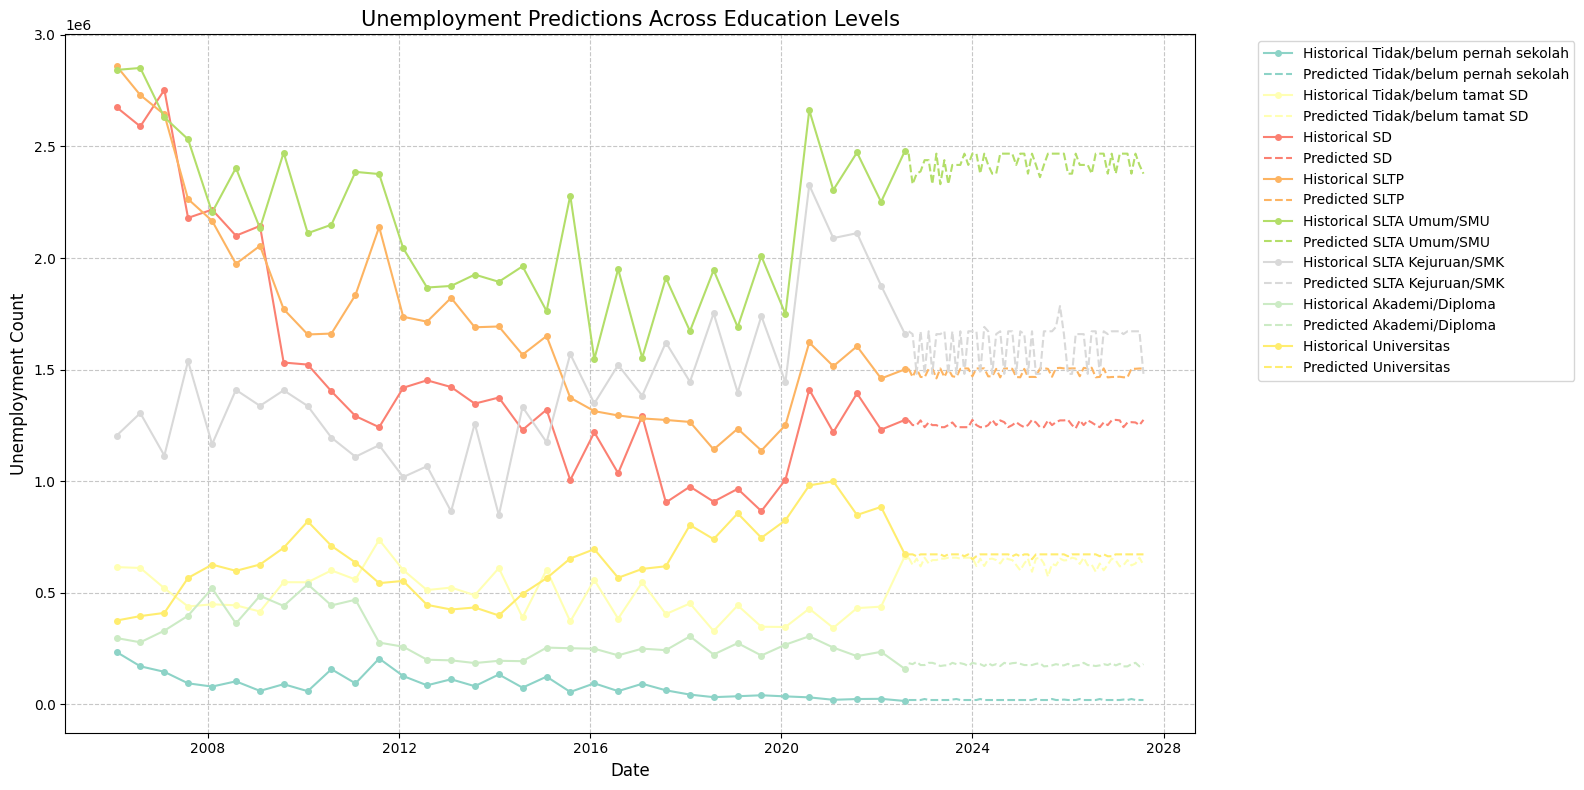

DatetimeIndex(['2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31',
               '2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31',
               '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30',
               '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30',
               '2025-12-31', '2026-01-31', '2026-02-28', '2026-03-31',
               '2026-04-30', '2026-05-31', '2026-06-30', '2026-07-31',
               '2026-08-31', '2026-09-30', '2026-10-31', '2026-11-30',
               '2026-12-31', '2027-01-31', '2027-02-28', '2027-03-31',
      

In [9]:
feature_columns = df.drop(columns=edu_columns).select_dtypes(include=['float64', 'int64']).columns
years = 5
predictions = {}

last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=years * 12, freq='ME')

plt.figure(figsize=(16, 8))

colors = plt.cm.Set3(np.linspace(0, 1, len(edu_columns)))

for i, col in enumerate(edu_columns):
    y = df[col].values
    X = df[feature_columns].values

    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    model = XGBRegressor(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    )
    model.fit(X_scaled, y)

    last_data_point = X_scaled[-1]
    future_X = []

    for _ in range(years * 12):
        noise = np.random.normal(0, 0.05, last_data_point.shape)
        future_point = last_data_point + noise
        future_X.append(future_point)

    future_X = np.array(future_X)

    future_predictions = model.predict(future_X)
    predictions[col] = future_predictions

    plt.plot(df['Date'], df[col],
            label=f'Historical {col}',
            color=colors[i],
            marker='o',
            markersize=4)

    plt.plot(future_dates, future_predictions,
            label=f'Predicted {col}',
            color=colors[i],
            linestyle='--')

plt.title('Unemployment Predictions Across Education Levels', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Count', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

predictions
future_dates

In [10]:
def create_time_features(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.quarter
    return df

In [11]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error

def advanced_xgboost_prediction(df, column, years_to_predict=10):
    df = create_time_features(df)

    features = ['Year', 'Month', 'Quarter'] + list(feature_columns)

    X = df[features].values
    y = df[column].values

    tscv = TimeSeriesSplit(n_splits=5)

    model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.03,
        max_depth=6,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.7,
        random_state=42
    )

    mape_scores = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mape = mean_absolute_percentage_error(y_test, y_pred)
        mape_scores.append(mape)

    print(f"Mean MAPE for {column}: {np.mean(mape_scores)}")

    last_date = df['Date'].iloc[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                                  periods=years_to_predict * 12,
                                  freq='ME')

    future_features = pd.DataFrame({
        'Date': future_dates,
        'Year': future_dates.year,
        'Month': future_dates.month,
        'Quarter': future_dates.quarter
    })

    for col in feature_columns:
        last_value = df[col].iloc[-1]
        future_features[col] = np.linspace(last_value, last_value * 1.2, len(future_dates))

    future_X = future_features[features].values
    future_predictions = model.predict(future_X)

    return future_predictions, future_dates, model.feature_importances_

Mean MAPE for Tidak/belum pernah sekolah: 0.4193816542625427
Mean MAPE for Tidak/belum tamat SD: 0.1336210235953331
Mean MAPE for SD: 0.2053566560149193
Mean MAPE for SLTP: 0.11240867823362351
Mean MAPE for SLTA Umum/SMU: 0.09630831107497215
Mean MAPE for SLTA Kejuruan/SMK: 0.15954715013504028
Mean MAPE for Akademi/Diploma: 0.22034010887145997
Mean MAPE for Universitas: 0.13970446214079857


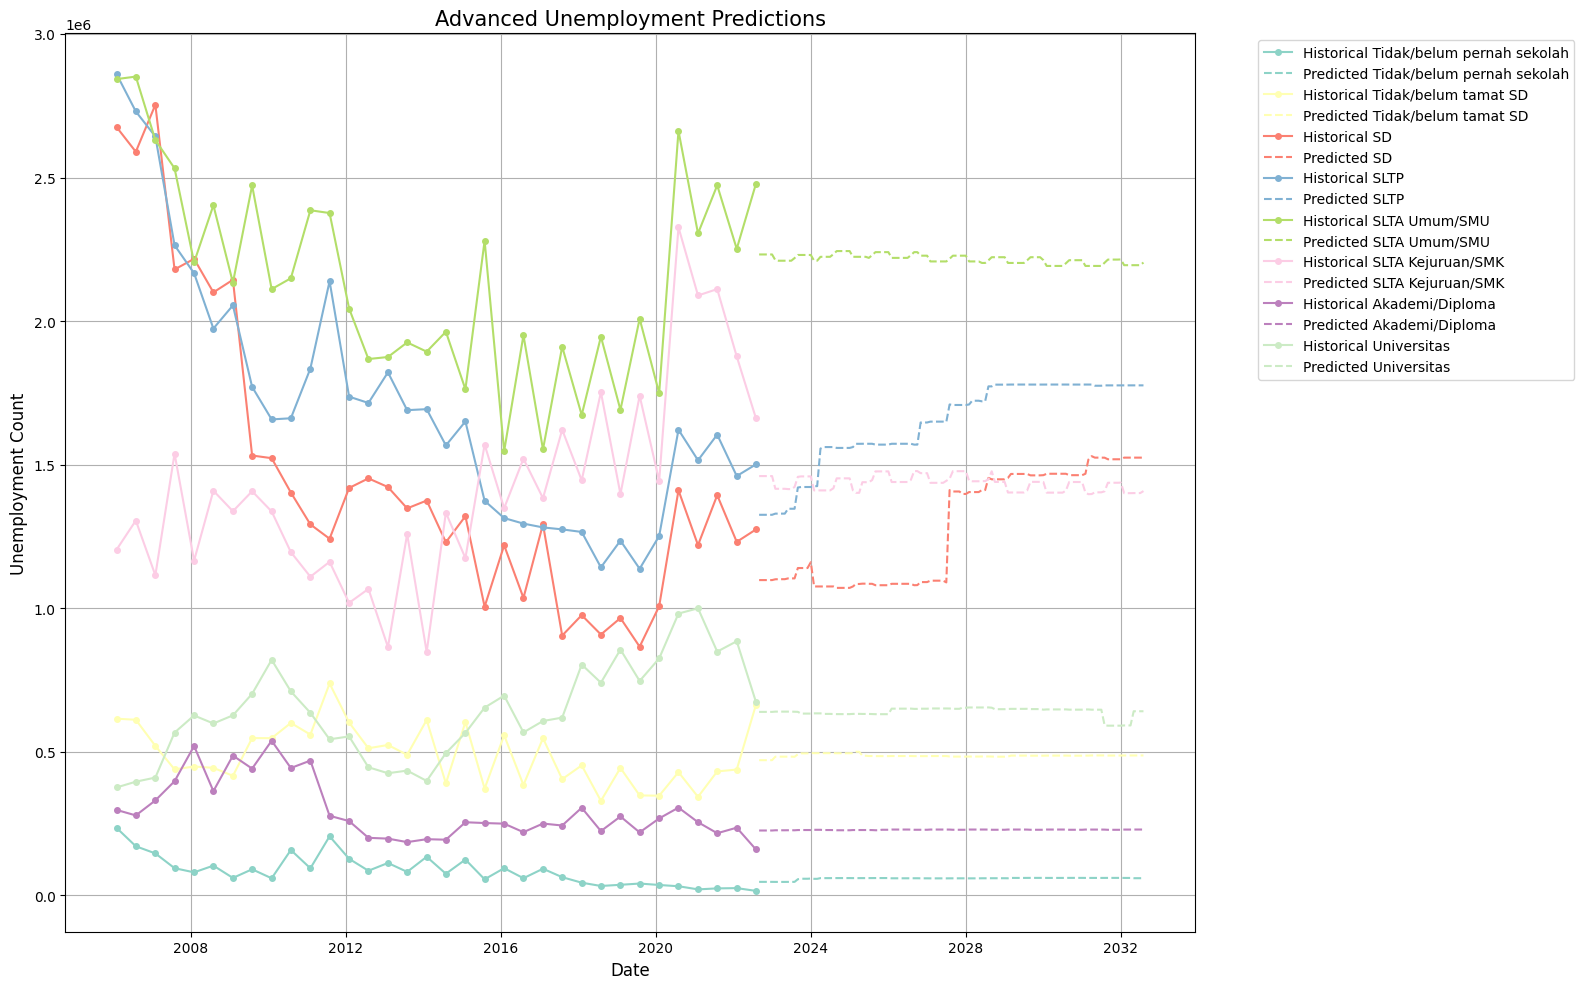

In [12]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(edu_columns):
    predictions, future_dates, importances = advanced_xgboost_prediction(df, col)

    plt.plot(df['Date'], df[col],
             label=f'Historical {col}',
             color=plt.cm.Set3(i/len(edu_columns)),
             marker='o',
             markersize=4)

    plt.plot(future_dates, predictions,
             label=f'Predicted {col}',
             color=plt.cm.Set3(i/len(edu_columns)),
             linestyle='--')

plt.title('Advanced Unemployment Predictions', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Count', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

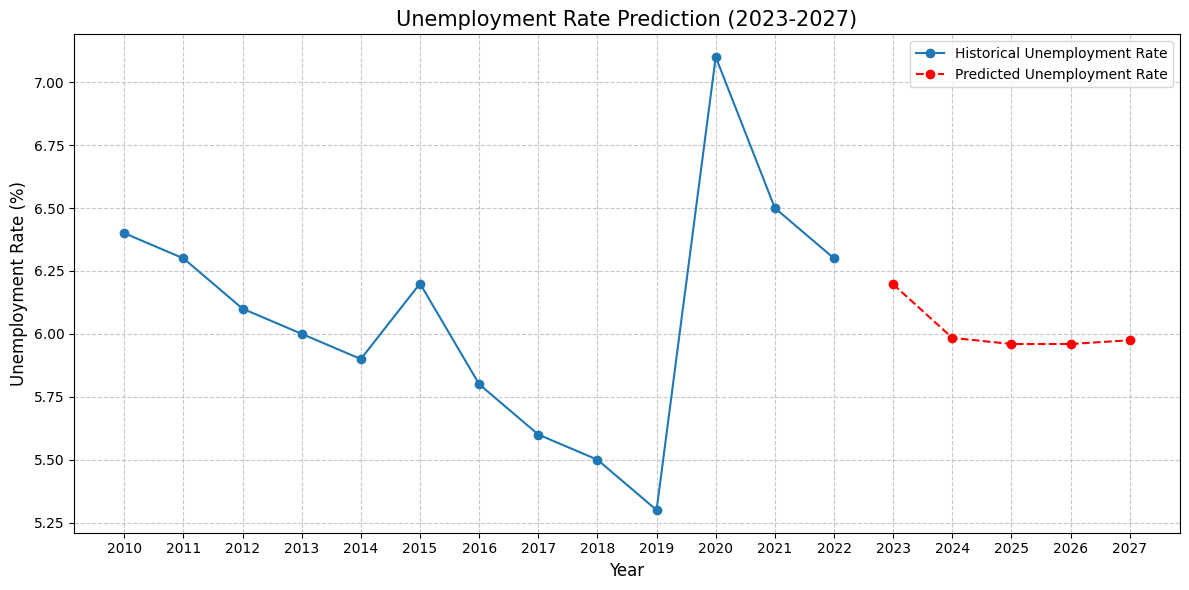

   Year  GDP_Growth  Job_Openings_Index  Predicted_Unemployment_Rate
0  2023         5.5                 122                     6.196887
1  2024         5.8                 127                     5.984203
2  2025         5.2                 133                     5.959632
3  2026         4.9                 130                     5.959795
4  2027         5.3                 135                     5.974729


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Data
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Unemployment_Rate': [6.4, 6.3, 6.1, 6.0, 5.9, 6.2, 5.8, 5.6, 5.5, 5.3, 7.1, 6.5, 6.3],
    'GDP_Growth': [6.2, 6.5, 6.3, 5.6, 5.0, 4.9, 5.0, 5.1, 5.2, 5.0, -2.1, 3.7, 5.3],
    'Job_Openings_Index': [95, 98, 100, 102, 105, 110, 115, 120, 125, 130, 110, 115, 120]
}

df = pd.DataFrame(data)

# Features and Target
X = df[['Year', 'GDP_Growth', 'Job_Openings_Index']]
y = df['Unemployment_Rate']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train XGBRegressor
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.005,
    max_depth=10,
    subsample=0.8,
    random_state=42
)
model.fit(X_scaled, y)

# Predict future unemployment rates (2023-2027)
future_years = np.arange(2023, 2028)
future_data = pd.DataFrame({
    'Year': future_years,
    # Assumed GDP growth with variability
    'GDP_Growth': [5.5, 5.8, 5.2, 4.9, 5.3],
    # Assumed job openings index with variability
    'Job_Openings_Index': [122, 127, 133, 130, 135]
})

# Scale future data
future_X_scaled = scaler.transform(future_data)
future_predictions = model.predict(future_X_scaled)

# Combine historical and predicted data
combined_years = np.concatenate([df['Year'], future_years])
combined_unemployment = np.concatenate([df['Unemployment_Rate'], future_predictions])

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Unemployment_Rate'], label='Historical Unemployment Rate', marker='o', linestyle='-')
plt.plot(future_years, future_predictions, label='Predicted Unemployment Rate', marker='o', linestyle='--', color='red')

plt.title('Unemployment Rate Prediction (2023-2027)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(np.arange(2010, 2028, 1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display predictions
future_data['Predicted_Unemployment_Rate'] = future_predictions
print(future_data)

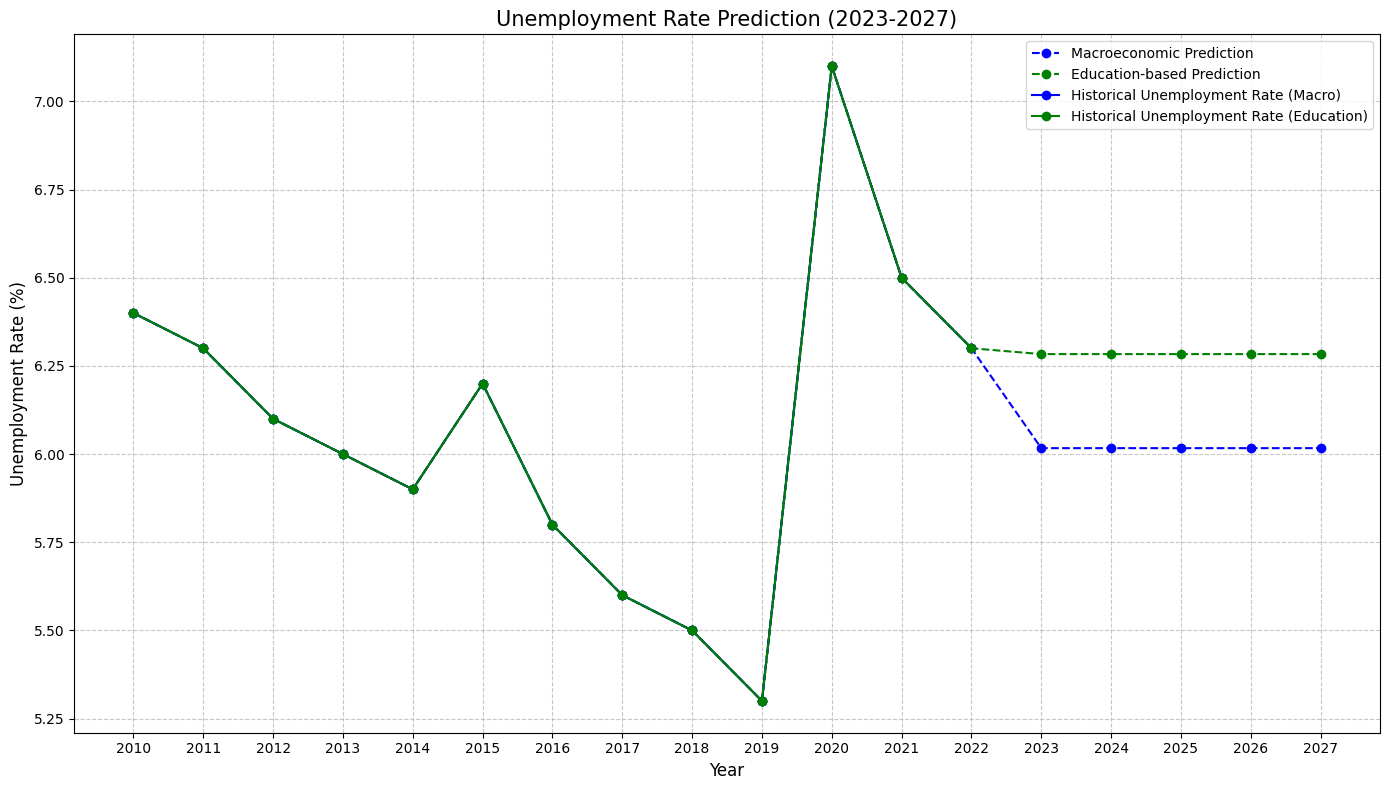

Macroeconomic Predictions:
    Year  GDP_Growth  Job_Openings_Index  Predicted_Unemployment_Rate
0  2023         5.5                 125                      6.01676
1  2024         5.6                 130                      6.01676
2  2025         5.8                 135                      6.01676
3  2026         5.9                 140                      6.01676
4  2027         6.0                 145                      6.01676
Education-based Predictions:
    Year  Predicted_Unemployment_Rate
0  2023                     6.283433
1  2024                     6.283433
2  2025                     6.283433
3  2026                     6.283433
4  2027                     6.283433


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Data Makroekonomi
data_macro = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Unemployment_Rate': [6.4, 6.3, 6.1, 6.0, 5.9, 6.2, 5.8, 5.6, 5.5, 5.3, 7.1, 6.5, 6.3],
    'GDP_Growth': [6.2, 6.5, 6.3, 5.6, 5.0, 4.9, 5.0, 5.1, 5.2, 5.0, -2.1, 3.7, 5.3],
    'Job_Openings_Index': [95, 98, 100, 102, 105, 110, 115, 120, 125, 130, 110, 115, 120]
}
df_macro = pd.DataFrame(data_macro)

# Data Pendidikan
data_edu = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Unemployment_Rate': [6.4, 6.3, 6.1, 6.0, 5.9, 6.2, 5.8, 5.6, 5.5, 5.3, 7.1, 6.5, 6.3],
    'No_Education': [10.2, 10.1, 10.0, 9.8, 9.7, 10.3, 10.1, 9.9, 9.7, 9.6, 11.2, 10.7, 10.5],
    'University': [3.5, 3.4, 3.3, 3.2, 3.1, 3.4, 3.3, 3.2, 3.1, 3.0, 4.0, 3.8, 3.7]
}
df_edu = pd.DataFrame(data_edu)

# Scale features for macroeconomic data
scaler_macro = StandardScaler()
X_macro = df_macro[['Year', 'GDP_Growth', 'Job_Openings_Index']]
y_macro = df_macro['Unemployment_Rate']
X_macro_scaled = scaler_macro.fit_transform(X_macro)

# Train macroeconomic model
model_macro = XGBRegressor(
    n_estimators=300,
    learning_rate=0.01,
    max_depth=7,
    random_state=42
)
model_macro.fit(X_macro_scaled, y_macro)

# Predict future macroeconomic unemployment rates
future_years = np.arange(2023, 2028)
future_data_macro = pd.DataFrame({
    'Year': future_years,
    'GDP_Growth': [5.5, 5.6, 5.8, 5.9, 6.0],
    'Job_Openings_Index': [125, 130, 135, 140, 145]
})
future_X_macro_scaled = scaler_macro.transform(future_data_macro)
future_predictions_macro = model_macro.predict(future_X_macro_scaled)

# Scale features for education data
scaler_edu = StandardScaler()
X_edu = df_edu[['Year']]
y_edu = df_edu['Unemployment_Rate']
X_edu_scaled = scaler_edu.fit_transform(X_edu)

# Train education model
model_edu = XGBRegressor(
    n_estimators=300,
    learning_rate=0.01,
    max_depth=7,
    random_state=42
)
model_edu.fit(X_edu_scaled, y_edu)

# Predict future education unemployment rates
future_data_edu = pd.DataFrame({
    'Year': future_years
})
future_X_edu_scaled = scaler_edu.transform(future_data_edu)
future_predictions_edu = model_edu.predict(future_X_edu_scaled)

# Combine results
combined_years = np.concatenate([df_macro['Year'], future_years])
combined_macro_unemployment = np.concatenate([y_macro, future_predictions_macro])
combined_edu_unemployment = np.concatenate([y_edu, future_predictions_edu])

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(combined_years, combined_macro_unemployment, label='Macroeconomic Prediction', marker='o', linestyle='--', color='blue')
plt.plot(combined_years, combined_edu_unemployment, label='Education-based Prediction', marker='o', linestyle='--', color='green')
plt.plot(df_macro['Year'], y_macro, label='Historical Unemployment Rate (Macro)', marker='o', linestyle='-', color='blue')
plt.plot(df_edu['Year'], y_edu, label='Historical Unemployment Rate (Education)', marker='o', linestyle='-', color='green')

plt.title('Unemployment Rate Prediction (2023-2027)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(np.arange(2010, 2028, 1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display predictions
future_data_macro['Predicted_Unemployment_Rate'] = future_predictions_macro
future_data_edu['Predicted_Unemployment_Rate'] = future_predictions_edu
print("Macroeconomic Predictions:\n", future_data_macro)
print("Education-based Predictions:\n", future_data_edu)

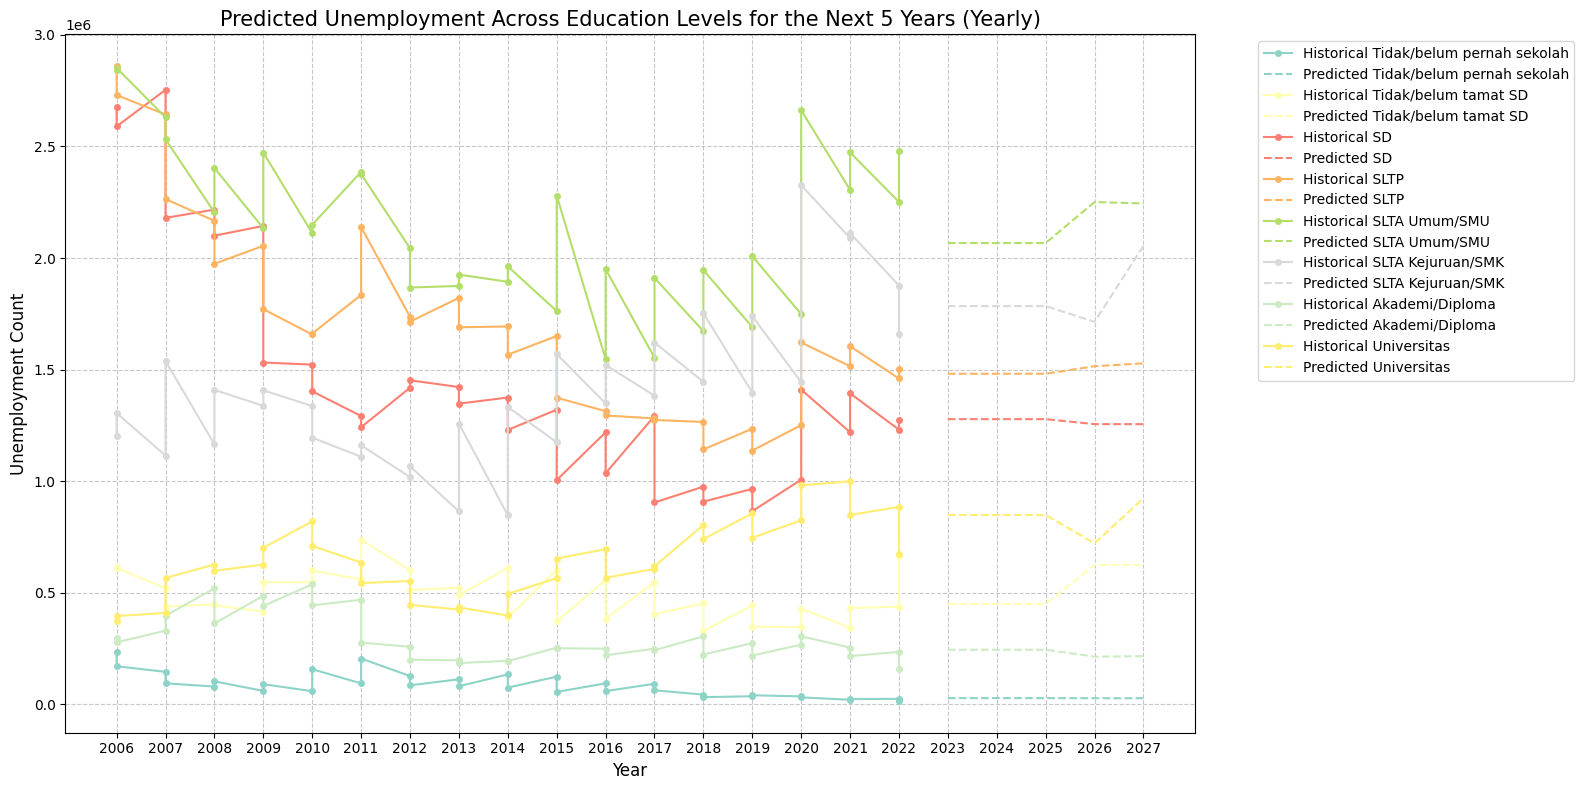

   Year  Tidak/belum pernah sekolah  Tidak/belum tamat SD           SD  \
0  2023                28011.640625           449694.8750  1278010.125   
1  2024                28011.640625           449694.8750  1278010.125   
2  2025                28011.640625           449694.8750  1278010.125   
3  2026                27568.976562           624917.3125  1255665.625   
4  2027                27568.976562           624917.3125  1255665.625   

          SLTP  SLTA Umum/SMU  SLTA Kejuruan/SMK  Akademi/Diploma  Universitas  
0  1481396.875    2067030.625        1784624.125     244852.28125   848487.250  
1  1481396.875    2067030.625        1784624.125     244852.28125   848487.250  
2  1481396.875    2067030.625        1784624.125     244852.28125   848487.250  
3  1515075.500    2250905.250        1714131.000     213663.43750   722095.375  
4  1528041.125    2244438.750        2054821.000     215922.21875   923218.000  


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv('/content/Data Training-1.csv')

# Mapping bulan ke format angka
MONTH_MAPPING = {
    'Januari': '01', 'Februari': '02', 'Maret': '03', 'April': '04',
    'Mei': '05', 'Juni': '06', 'Juli': '07', 'Agustus': '08',
    'September': '09', 'Oktober': '10', 'November': '11', 'Desember': '12'
}

# Data preprocessing
df = df.drop_duplicates()
df['Date'] = df.apply(lambda row: pd.to_datetime(f"{row['Periode']}-{MONTH_MAPPING[row['Bulan']]}-01"), axis=1)
df = df.sort_values('Date')

edu_columns = [
    'Tidak/belum pernah sekolah',
    'Tidak/belum tamat SD',
    'SD',
    'SLTP',
    'SLTA Umum/SMU',
    'SLTA Kejuruan/SMK',
    'Akademi/Diploma',
    'Universitas'
]

# Menambahkan kolom 'Year' dan 'Month' sebagai fitur
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Define feature columns, include 'Month' and 'Year'
feature_columns = ['Total', 'Year', 'Month']
X = df[feature_columns].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize predictions dictionary and prepare future dates
years_to_predict = 5
last_year = df['Date'].dt.year.max()
future_years = np.arange(last_year + 1, 2028)  # Predict until 2027

# Generate varied assumptions for future data
future_total = np.linspace(df['Total'].mean() * 0.95, df['Total'].mean() * 1.05, len(future_years))
future_month = 1  # Assume predictions start from January
future_X = np.array([[total, year, future_month] for year, total in zip(future_years, future_total)])
future_X_scaled = scaler.transform(future_X)

# Initialize plot
plt.figure(figsize=(16, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(edu_columns)))

# Predict future unemployment for each education level
predictions = {}

for i, col in enumerate(edu_columns):
    y = df[col].values

    # Train XGBRegressor with deeper trees or more estimators to capture complex patterns
    model = XGBRegressor(
        n_estimators=300,  # Increase number of trees
        learning_rate=0.01,  # Lower learning rate for better fitting
        max_depth=7,  # Deeper trees to capture patterns
        random_state=42
    )
    model.fit(X_scaled, y)

    # Predict future unemployment for each year
    future_predictions = model.predict(future_X_scaled)
    predictions[col] = future_predictions

    # Plot historical and future predictions
    plt.plot(df['Date'].dt.year, df[col], label=f'Historical {col}', color=colors[i], marker='o', markersize=4)
    plt.plot(future_years, future_predictions, label=f'Predicted {col}', color=colors[i], linestyle='--')

# Finalize plot
plt.title('Predicted Unemployment Across Education Levels for the Next 5 Years (Yearly)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Count', fontsize=12)
plt.xticks(np.arange(min(df['Date'].dt.year), 2028, 1))  # Ensure x-axis includes 2027
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Convert predictions to DataFrame for tabular display
future_data = pd.DataFrame(future_years, columns=['Year'])
for col in edu_columns:
    future_data[col] = predictions[col]

# Display the prediction for the next 5 years
print(future_data)